     Pierre-François SAUNIER
     Clara ALLOIS


# PROJET NUMERIQUE: LIGNES DE NIVEAU


Quelques installations nécessaires :

In [1]:
from math import *
import matplotlib.pyplot as plt
import autograd
from autograd import numpy as np

# 1ère méthode : par dichotomie 

## Contour simple:




### Amorce : 



La fonction $f$ étant continûment différentiable, $y \mapsto f(0,y)$ est en particulier continue.

Ainsi, le théorème des valeurs intermédiaires assure que si $ c \in [f(0,0) , f(0,1)]$  ( resp $[f(0,1) , f(0,0)]$ ) alors il existe $ t \in [0 ; 1]$ tel que $f(0,t) = c$.

On écrit alors une recherche de zéro par dichotomie, que l'on applique à $y \mapsto g(y) := f(0,y) - c$

In [2]:
def find_seed(f,c=0,eps=10**-5):
    
    
    def g(y):
        return f(0,y)-c
   
    a=0
    b=1
    if g(a)*g(b)>0:
        return None
    
    
    while b-a>=eps:
        mil=(a+b)/2
        if g(a)*g(mil)<=0:
            b=mil
        else : 
            a=mil
    
    return a

Un premier test simple :

In [3]:
def f(x,y):
    return x**2+y**2

find_seed(f,0.5)

0.7070999145507812

$0^2 + 0,707^2=0.5$ : cela fonctionne (dans la dichotomie de find_seed, on travaille à $x=0$)

### Propagation:

On utilise, dans notre première méthode naïve, cette dichotomie le long de diverses lignes verticales. On modifie find_seed de manière à pouvoir l'appliquer en différentes absisses (et plus seulement en $x=0$). 

Ici, l'appel $find$_$seed2(f,c,abscisse)$ renvoie le (ou un) réél $y \in [0;1]$ tel que $f(abscisse,y) = c$.

In [4]:
def find_seed2(f,abscisse,c=0,eps=10**-5):
    
    def g(x,y):
        return f(x,y)-c
    
    a=0
    b=1
    if g(abscisse,0)*g(abscisse,1)>0:
        return None
    
    while b-a>=eps:
        mil=(a+b)/2
        if g(abscisse,a)*g(abscisse,mil)<=0:
            b=mil
        else : 
            a=mil
    return a

Définissons alors la fonction $simple$_$contour$, qui balaye horizontalement le carré $[0;1]^2$. La liste $X$ contient les abscisses (en l'occurence des pas réguliers) et $Y$ contient les valeurs correspondantes retournées par la dichotomie.

On arrête la boucle lorsque les abscisses dépassent $1$ (on se limite ici au carré) ou lorsque l'appel à $find$_$seed2$ ne renvoie plus rien (si la ligne de niveau "sort" du carré).

In [5]:
def simple_contour(f,c=0.0,delta=0.01,eps=10**-5):
    pas=delta/sqrt(2)
    abscisse=0.0
    X=[]
    Y=[]
    while abscisse<=1 and find_seed2(f,abscisse,c,eps)!=None:
        X.append(abscisse)
        Y.append(find_seed2(f,abscisse,c,eps))
        abscisse+=pas
        
    return (X,Y)

Un premier exemple simple avec $f : (x,y) \mapsto x^2 + y^2$ et la ligne de niveau de valeur $c=1$.

On obtient effectivement l'arc de cercle correspondant, dans $[0;1]^2$.

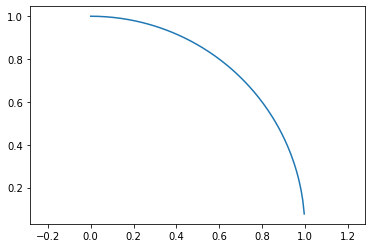

In [6]:
#Exemple 1 : arc de cercle
def f(x,y):
    return x**2+y**2

(X,Y)=simple_contour(f,c=1.0)
plt.plot(X,Y)
plt.axis('equal')
plt.show()

Essayons désormais avec la fonction proposée par l'énoncé du polycopié, et les lignes de niveaux dont les valeurs sont listées dans $L$.

Remarquons que les lignes de niveau de valeurs négatives ne s'affichent pas. En effet, elles n'ont pas d'intersection avec l'arrête gauche du carré, et donc la boucle $while$ du code de $simple$_$contour$ s'arrête dès le premier tour.

Ceci justifie la modification que l'on apporte ci-après : on balaiera le carré en partant de toutes les arrêtes.

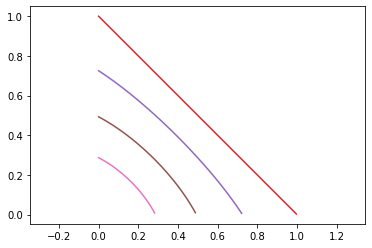

In [7]:
#Exemple 2 : avec la fonction proposée par le polycopié
def f(x,y):
    return (exp(-x**2-y**2)-exp(-(x-1)**2-(y-1)**2))

L =  [-0.7, -0.5, -0.25, 0, 0.25, 0.5, 0.7]

for c in L:
    X,Y = simple_contour(f,c)
    plt.plot(X,Y)
plt.axis('equal')
plt.show()

## Améliorations à cette méthode de dichotomie

On définit la fonction $find$_$seed$_$ordonnee$. Elle fait le même travail que $find$_$seed2$, i.e de la dichotomie sur un segment vertical à une abscisse donnée. 

On lui rajoute les arguments $ybas$ et $yhaut$ pour délimiter l'arrête verticale en question (qui était l'arrête $[0;1]$ dans le code$find$_$seed2$).

In [8]:
def find_seed_ordonnee(f,abscisse,ybas,yhaut,c,eps=10**-5):
    
    def g(x,y):
        return (f(x,y)-c)
    
    if g(abscisse,ybas)*g(abscisse,yhaut)>0:
        return(None)
    a=ybas
    b=yhaut
    
    while b-a >= eps:
        mil=(a+b)/2
        if g(abscisse,a)*g(abscisse,mil)<=0:
            b=mil
        else:
            a=mil
    return(b)

De la même façon, $find$_$seed$_$abscisse$ fait le même travail, cette fois-ci le long d'une arrête horizontale. 

On lui donne donc l'ordonnée à laquelle on souhaite effectuer la dichotomie, ainsi que les valeurs $xgauche$ et $xdroit$ de l'arrête que l'on veut parcourir. 

In [9]:
def find_seed_abscisse(f,ordonnee,xgauche,xdroit,c,eps=10**-5):
    
    def g(x,y):
        return (f(x,y)-c)
    
    if g(xgauche,ordonnee)*g(xdroit,ordonnee)>0:
        return(None)
    a=xgauche
    b=xdroit
    
    while b-a >= eps:
        mil=(a+b)/2
        if g(a,ordonnee)*g(mil,ordonnee)<=0:
            b=mil
        else:
            a=mil
    return(b)

Finalement, définissons $simple$_$contour2$. Les valeurs $xgauche$, $xdroit$, $ybas$ et $yhaut$ délimitent le carré que l'on étudie. 

On parcourt ensuite horizontalement (de gauche à droite puis de droite à gauche) et verticalement (de bas en haut puis de haut en bas) le carré afin de récupérer le long des quatre arrêtes le plus d'intersections avec des lignes de niveau, pour éviter le problème mentionné avec les valeurs négatives de l'exemple 2.

In [10]:
def simple_contour2(f,xgauche,xdroit,ybas,yhaut,c,delta=0.01,eps=10**-5):
    pas = delta / np.sqrt(2)
    
    
    
    abscisse = xgauche
    X1=[]
    Y1=[]
    while abscisse<=xdroit and find_seed_ordonnee(f,abscisse,ybas,yhaut,c,eps)!=None:
        X1.append(abscisse)
        Y1.append(find_seed_ordonnee(f,abscisse,ybas,yhaut,c,eps))
        abscisse=abscisse + pas
    plt.plot(X1,Y1)
    
    
    
    
    
    abscisse = xdroit
    X2=[]
    Y2=[]
    while abscisse>=xgauche and find_seed_ordonnee(f,abscisse,ybas,yhaut,c,eps)!=None:
        X2.append(abscisse)
        Y2.append(find_seed_ordonnee(f,abscisse,ybas,yhaut,c,eps))
        
        abscisse=abscisse - pas
    plt.plot(X2,Y2)
    
    
    ordonnee = ybas
    X3=[]
    Y3=[]
    while ordonnee<=yhaut and find_seed_abscisse(f,ordonnee,xgauche,xdroit,c,eps)!=None:
        X3.append(find_seed_abscisse(f,ordonnee,xgauche,xdroit,c,eps))
        Y3.append(ordonnee)
        ordonnee=ordonnee + pas
    plt.plot(X3,Y3)

    ordonnee = yhaut
    X4=[]
    Y4=[]
    while ordonnee>=ybas and find_seed_abscisse(f,ordonnee,xgauche,xdroit,c,eps)!=None:
        X4.append(find_seed_abscisse(f,ordonnee,xgauche,xdroit,c,eps))
        Y4.append(ordonnee)
        ordonnee=ordonnee - pas
    plt.plot(X4,Y4)
    

Essayons avec l'exemple de l'énoncé  $(x,y) \mapsto 2\  (\ e^{-x^2 - y^2} - e^{-(x-1)^2 - (y-1)^2} )$

On va regarder ce qu'il se passe sur le carré $[-1 ; 2]^2$. Pour ce faire, on découpe ce carré en plusieurs sous carré dont les abscisses et ordonnées limites sont stockées dans la liste $côté$.

On recherche aussi différentes valeurs de lignes de niveau, contenues dans la liste $valeurs$.

$ !!!! $$\ \ \underline{Warning} :$ éxécuter la prochaine cellule prend une quinzaine de secondes.

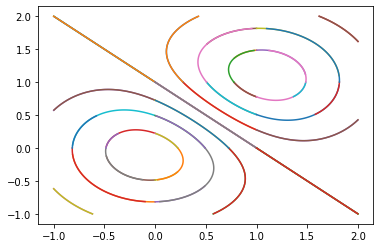

In [11]:
def f(x,y):
    return ( 2*(np.exp(-x**2-y**2) - np.exp(-(x-1)**2-(y-1)**2)))


côté = [-1, 0, 1, 2]
valeurs = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

for i in range(len(côté)-1):
    
    for j in range(len(côté)-1):
    
        for c in valeurs :
        
            simple_contour2(f,côté[i],côté[i+1],côté[j],côté[j+1],c)


plt.show()

Le résultat est visuellement satisfaisant. Notons évidemment une extrême lenteur dans la méthode : la dichotomie est lourde.

# 2ème méthode, moins naïve

Ici, plutôt que d'user abruptement de dichotomies successives, on va véritablement $suivre$ la ligne de niveau. Placons-nous en régime de croisière (nous réfléchirons plus tard à l'initialisation).

On est actuellement au point $(x_0 , y_0)$ sur notre ligne de niveau de valeur $c$. 

Pour trouver un point sur la ligne de niveau à une distance $delta$, on va étudier la fonction f le long du cercle de rayon $delta$ centré en $(x_0 , y_0)$. 

Par la méthode de Newton, on cherche sur ce cercle un point en lequel $f$ prend la valeur $c$. 

Pour initialiser correctement la méthode de Newton, on suit la tangente à la courbe au point $(x_0 , y_0)$.

Calculons d'abord le gradient de $f$ en $(x,y)$.

In [12]:
def gradient(f,x,y):
    g = autograd.grad
    return np.r_[g(f,0)(x,y) , g(f,1)(x,y)]

Et définissons aussi la recherche de zéro par la méthode de Newton.

Le test d'arrêt choisi pour la méthode de Newton est un nombre d'itération, que l'on fixe par défaut à 5. 

Note : nous avions au départ fixé une valeur de $n$ plus élevée ($n=20$ par exemple), mais nous nous sommes rendus compte que $n=5$ permet d'augmenter considérablement la rapidité sans perdre beaucoup de précision sur le tracé des lignes de niveau.

In [13]:
def newton(f,x0,n=5):
    x = x0
    deriv = autograd.grad(f)
    for i in range(n):
        x = x - f(x)/deriv(float(x))
    return(x)

Pour trouver le point suivant. Cela consiste essentiellement à initialiser la méthode de Newton. Pour ce faire, on prend le gradient de $f$ en $(x_0 , y_0)$. La tangente s'en déduit par la rotation d'angle $\pi / 2$ i.e la transformation $(a,b) \mapsto (-b,a)$ Après avoir normalisé le gradient, on définit donc le vecteur tangente.

In [14]:
def point_suivant(fc,c,x0,y0,delta):
    gradi = gradient(fc,x0,y0)                                #on calcule le gradient de valeur (a,b)
    gradi = gradi / sqrt( gradi[0]**2 + gradi[1]**2)          #on le normalise
    tange = (-gradi[1] , gradi[0] )                           #on en déduit la tangente de valeur (-b,a)
    theta0 = atan2(tange[1],tange[0])                         #on tire l'angle correspondant au point d'initialisation
                                                              #si la tangente a pour valeur (x,y), l'angle est arctan(y/x)
    
    def g(theta):                                                               #ainsi défini, g(x) est la valeur de f le 
        return fc(x0+delta * np.cos(theta) , y0 + delta * np.sin(theta) ) - c   #long du cercle à l'angle x. On retire c
                                                                                #pour appliquer newton à g
    thetafinal = newton(g , theta0)
    
    return (x0 + delta * np.cos(thetafinal) , y0 + delta * np.sin(thetafinal) )

Testons notre méthode sur la fonction de l'énoncé $(x,y) \mapsto 2\  (\ e^{-x^2 - y^2} - e^{-(x-1)^2 - (y-1)^2} )$

Suivons la courbe que l'on observe après éxécution de l'exemple $2$ ; la sorte d'ovale qui passe par le point $(-0.5 , 0)$

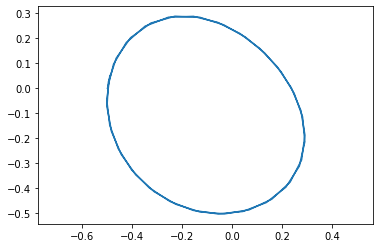

In [15]:
def f(x,y):
    return ( 2*(np.exp(-x**2-y**2) - np.exp(-(x-1)**2-(y-1)**2)))

x0,y0 = -0.5 , 0.0
X=[x0]
Y=[y0]
x,y = x0 , y0
for i in range(50):
    x,y = point_suivant(f,f(x0,y0),x,y,0.1)           #on prend c=f(x0,y0) pour suivre la ligne de niveau passant par le premier point
    X.append(x)
    Y.append(y)

plt.plot(X,Y)
plt.axis('equal')
plt.show()

Définissons donc plus proprement une fonction $contour$_$simple3$ reprenant l'idée précédente.

In [16]:
def contour_simple3(f,c,n=50,delta=0.1):
    x=0.                        # on fait démarrer la ligne de niveau en x=0 et en un y que l'on obtient par dichotomie
    y=find_seed(f,c)            #
    X,Y = [x],[y]
    for i in range(n):
        x,y = point_suivant(f,c,x,y,delta)
        X.append(x)
        Y.append(y)
    plt.plot(X,Y)

Nous pouvons essayer de tracer quelques lignes de niveaux, en prenant chaque fois 60 points :

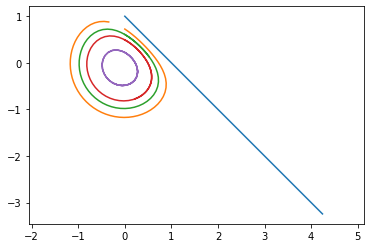

In [18]:
for c in [0.,0.5,0.75,1.,1.5]:
    contour_simple3(f,c,60)
plt.axis('equal')
plt.show()

Essayons une dernière modification, pour observer les lignes de niveaux de $f$. Le graphe obtenu ci dessus est très "localisé" autour du carré $[-1 ; 1]^2$ (car nous initialisons chaque recherche de ligne de niveau dans cette zone).

La fonction suivante prend en argument une liste de points, et trace la ligne de niveau qui passe par les points en questions. Ainsi, si l'on donne une liste de points qui quadrillent le plan, on aura un apercu plus global du relief de $f$.

In [19]:
def contour_points(f,listex,listey,n=50,delta=0.1):
    for x in listex:
        for y in listey:
            x0,y0 = x,y
            X,Y = [x],[y]
            for i in range(n):
                x , y = point_suivant(f,f(x0,y0),x,y,delta)
                X.append(x)
                Y.append(y)
            plt.plot(X,Y)
    plt.axis('equal')
    plt.show()

Voici ce qu'il se passe lorsque l'on éxécute : 

$listeX = [-4., -2., 0., 2., 4.]$

$listeY = [-4., -2., 0., 2., 4.]$

$contour$_$points(f, listeX, listeY, 400)$

C'est à dire que l'on trace 400 points de ligne de niveau sur chaque ligne de niveau passant par chaque couple $(x,y) \in listeX \times listeY $


Je joins directement l'image pour épargner le temps d'attente affreux de l'éxécution de cette cellule.

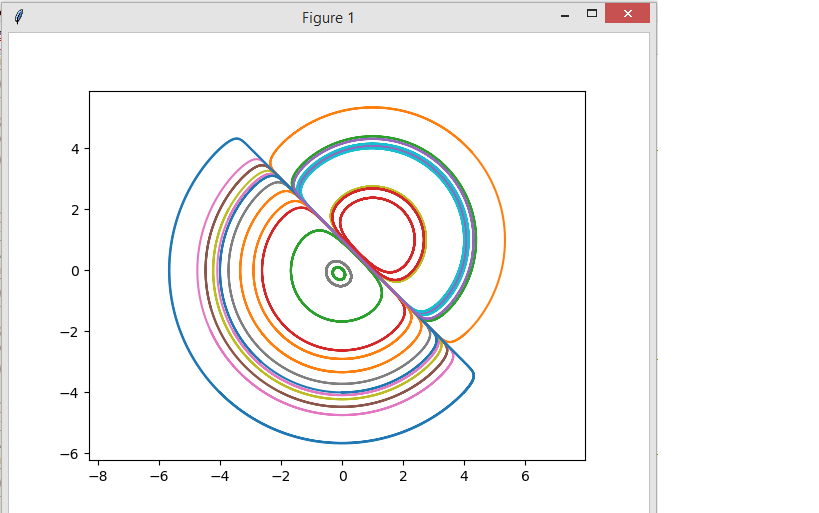